# Mid-air Loss of Separation Detection Module (MLSDM)

Author: Yanyu Wang, Carnegie Mellon University

Email: yanyuwan@andrew.cmu.edu

# Overview of MLSDM Module
This module uses data collected from ASU's Air Traffic Controller Simulation Experiments where three 25 minute approach scenarios were simulated - a baseline workload, a high workload under nominal conditions, and a high workload under off-nominal conditions. Information on these data can be found on the ASU ULI's website [here](https://uli.asu.edu/wp-content/uploads/2020/08/Presentation-AIAA-talk-2019-Task-3-Human-Systems-Integration.pdf). 

The performance measure of the ATC experiments in each scenario were Loss of Separation (LoS) where aircraft fail to maintain minimum separation distances in controlled airspace. The presence of LoS within each sequential 5 second time interval is shown in ``los.csv``. Similarly, the number of aircraft in the the current and past 9 time intervals are shown in ``n_data.csv``. Finally, the number of turning aicraft computed in the current and past 9 time intervals are shown in ``tn_data.csv``. 

Therefore, this module uses number of aircraft and number of turning aircraft at the current time step and some previous time interval to train a model to predict LoS. The aim is support air traffic controllers in alerting when LoS is likely to occur over a given time horizon. More information about the methods in this module can be found [here](https://doi.org/10.1109/WSC48552.2020.9384047).

## Installing the required Python packages
The required Python packages for this module are:
- **[```pandas```]**
- **[```sklearn```]**
- **[```seaborn```]**
    
In the Ubuntu or Anaconda terminal, execute ```conda install pandas sklearn seaborn```. 

## Step 1: Visualizing Training Data
### 1a: Visualize LoS Data

In [1]:
import pandas as pd

y = pd.read_csv('los.csv')
y.head()

,LoSs
0,0
1,0
2,0
3,0
4,0


### 1b: Visualize Number of Aircraft Data

In [2]:
n_data = pd.read_csv('n_data.csv')
n_data.head()

,0,1,2,3,4,5,6,7,8,9
0,2,2,1,1,1,1,1,1,1,1
1,2,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,2


### 1c. Visualize Number of Turning Aircraft Data

In [3]:
tn_data = pd.read_csv('tn_data.csv')
tn_data.head()

,10,11,12,13,14,15,16,17,18,19
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


## Step 2: Develop Class for Training LoS Models
The developed ```train_los_model``` class contains the three methods building in complexity:
- ```model_based_on_N```
- ```model_based_on_TN```
- ```model_based_on_N_and_TN```

This class uses logistic regression over the supplied data and allows for visualization if desired.

In [4]:
from paraatm.safety.los import LosModel

In [5]:
i = 7
j = 8
m = 0
n = 3

losmodel = LosModel('logRegr_N_{}_{}_TN_{}_{}_model.pkl'.format(i,j,m,n),model_type='LogisticRegression')

In [15]:
import numpy as np
x_test = np.hstack([n_data.values[:,i:j],tn_data.values[:,m:n]])

In [16]:
y_test = y

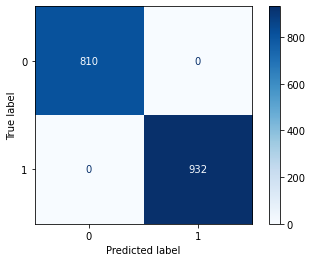

In [17]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(losmodel.model, x_test, y_test, cmap = 'Blues') 